In [8]:
read.table('resultados.dat')-> d

In [9]:
ra <- d$V1
dec<-d$V2
z<-d$V3
Mr <- d$V6
UR <- d$V15
GR <- d$V16
C <- d$V14
fdev <- d$V19
r50 <- d$V17
mu <- d$V21

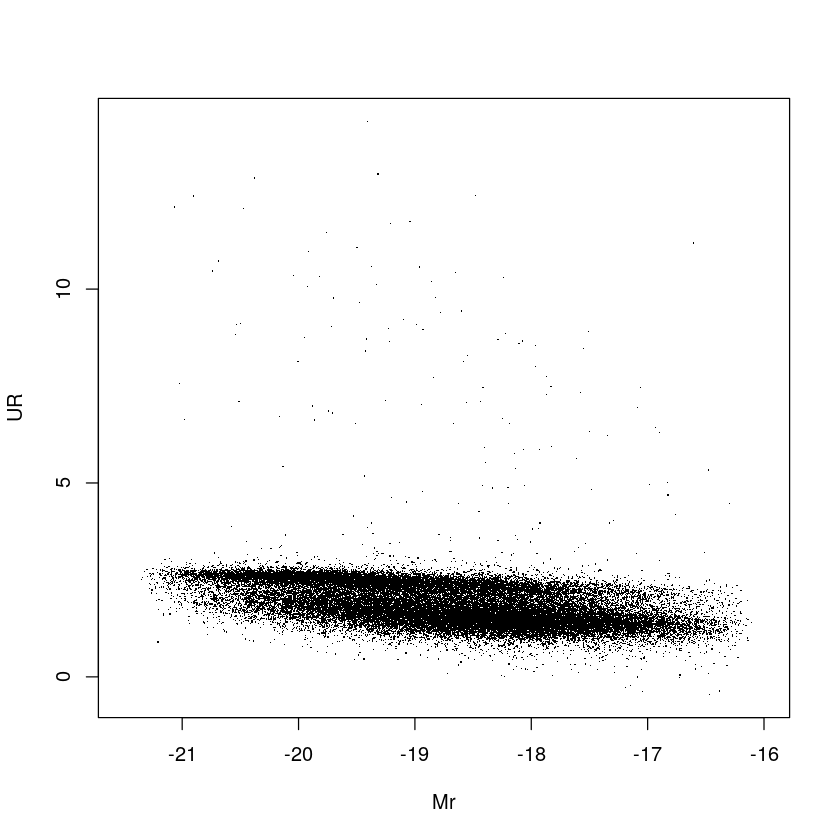

In [10]:
plot(Mr,UR,pch='.', xlim=c(-21.5,-16.))

In [11]:
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3)
par(mar=c(5,5,1,1))
#hist(mu,plot=FALSE)

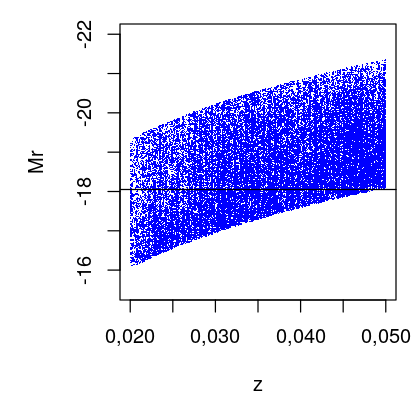

In [12]:
#png('Mag_z.png')
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3.5)
par(mar=c(5,5,1,1))
plot(z,Mr,col='blue',pch='.',ylim=c(-15.5,-22.) )
abline(h=-18.05)
#dev.off()

In [13]:
z2<-subset(z, Mr < -18.05)
Mr2 <- subset(Mr, Mr< -18.05)
UR2 <- subset(UR, Mr< -18.05)
GR2 <- subset(GR, Mr< -18.05)
C2 <- subset(C, Mr< -18.05)
fdev2 <- subset(fdev, Mr< -18.05)
r502 <- subset(r50, Mr< -18.05)
mu2 <- subset(mu, Mr< -18.05)

In [14]:
length(Mr)

[1] 45283

In [15]:
library(repr)
options(repr.plot.width=2, repr.plot.height=2)
#par(mfrow=c(2,1))
u_r <- hist(UR2,breaks=seq(-200,200,.1),plot=FALSE)
g_r <- hist(GR2,breaks=seq(-200,200,.1),plot=FALSE)


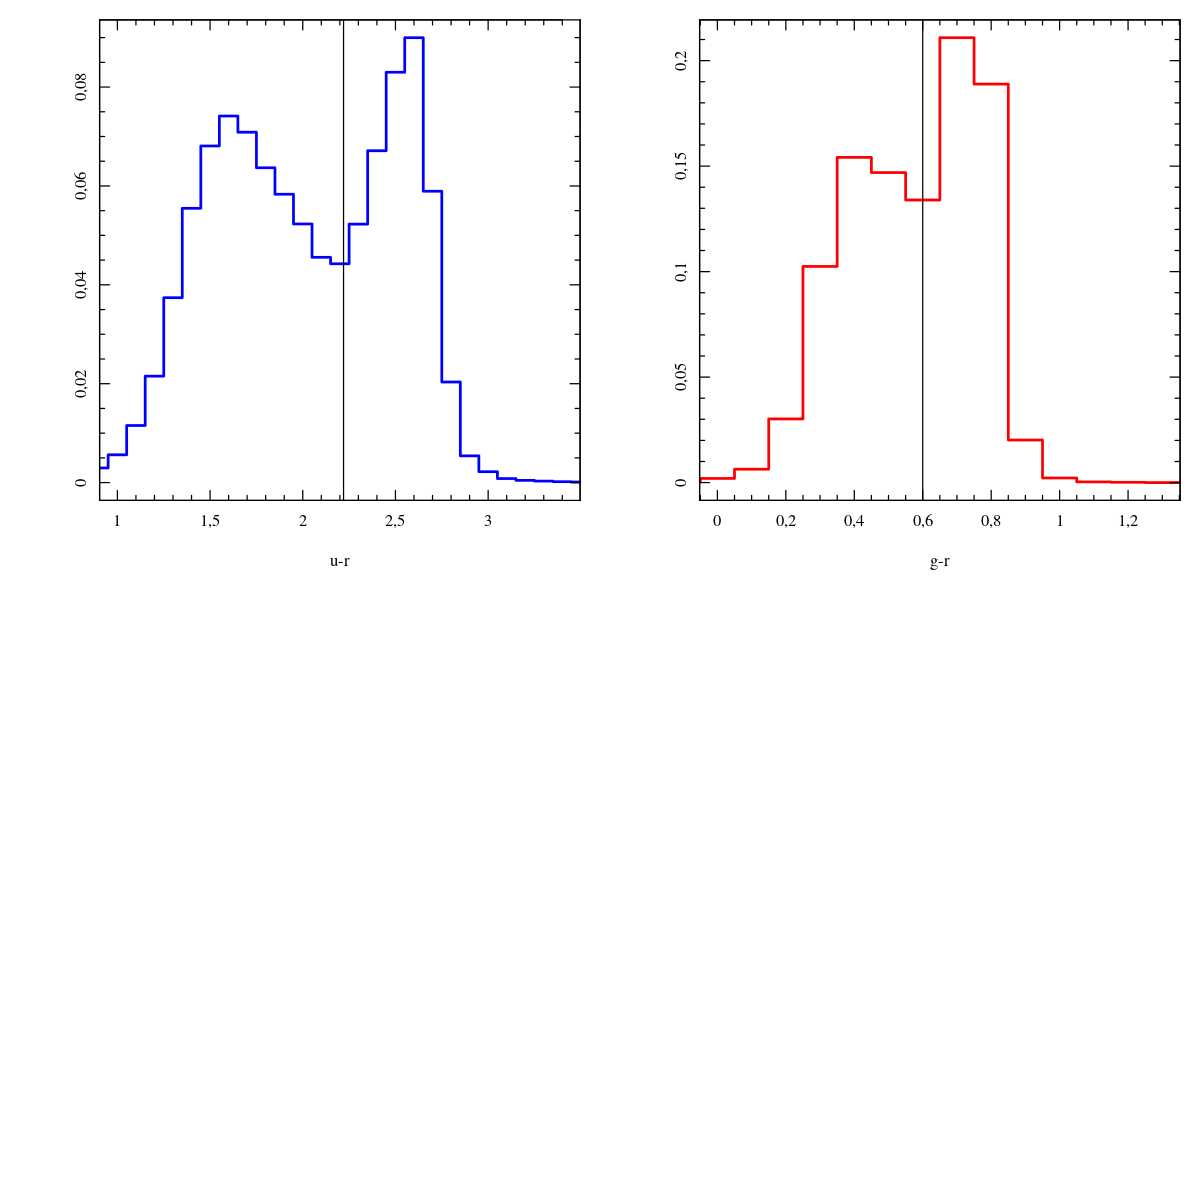

In [93]:
#png('hist_color.png')
library(repr)
library(astro)
options(repr.plot.width=10, repr.plot.height=10)

par(family='serif')
par(lwd=1)
par(cex=1)

par(mar=c(5,5,1,1))
par(mfrow=c(2,2))
par(mgp=c(1.2,.4,0))
aplot(u_r$mids,u_r$count/sum(u_r$counts),type='s',xlim=c(1,3.4),xlab='u-r',ylab='',col='blue',lwd=2.2)
abline(v=2.22)

aplot(g_r$mids,g_r$count/sum(g_r$counts),type='s',xlim=c(0,1.3),xlab='g-r',ylab='',col='red',lwd=2.2)
abline(v=0.6)
#dev.off()

In [18]:
c_hist <- hist(C2,breaks=seq(0,50,.1),plot=FALSE)
fdev_hist <- hist(fdev2,seq(0,1,.05),plot=FALSE)

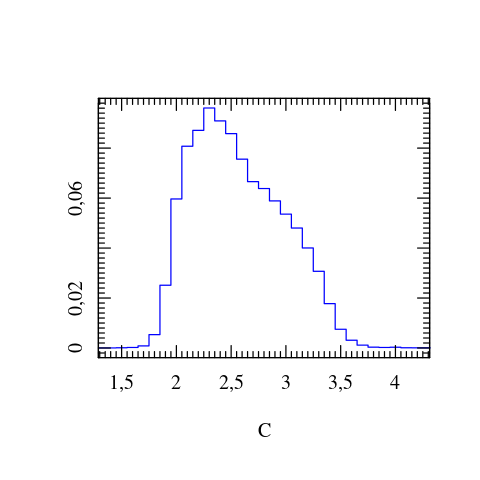

In [19]:
#png('c_parametro.png')
library(repr)
library(astro)
par(family='serif')
par(lwd=1)
par(cex=1)
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))
aplot(c_hist$mids,c_hist$count/sum(c_hist$counts),type='s',col='blue',xlim=c(1.4,4.2),xlab='C',ylab='')
#dev.off()

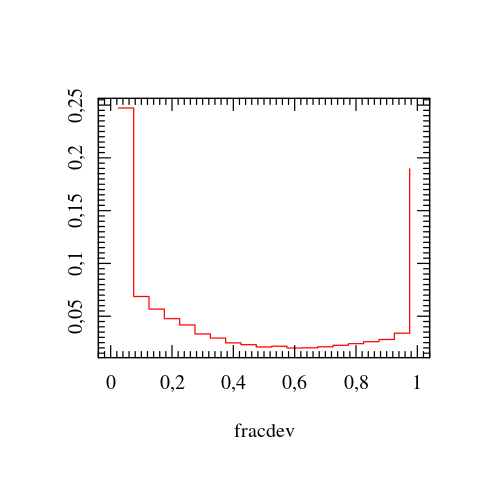

In [20]:
#png('fravdev.png')
library(repr)
library(astro)
par(family='serif')
par(lwd=1)
par(cex=1)
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))
aplot(fdev_hist$mids,fdev_hist$count/sum(fdev_hist$counts),type='s',col='red',xlim=c(0,1),xlab='fracdev',ylab='')
#dev.off()


Call:
lm(formula = C2 ~ fdev2)

Coefficients:
(Intercept)        fdev2  
     2,1455       0,8633  



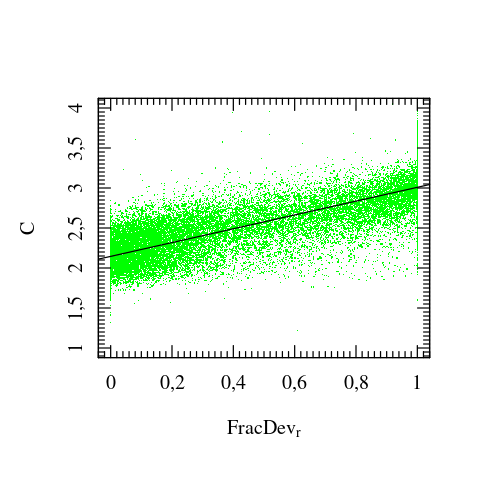

In [21]:
#png('C_fdev.png')
par(family='serif')
par(lwd=1)
par(cex=1)
aplot(fdev2,C2,pch='.',ylim=c(1,4),col='green',ylab=c('C'),xlab=expression(FracDev[r]))
#legend(0.05,3.8,c('intercepta: 2.146', 'pendiente: 0.086'))
lm(C2~fdev2) -> z
abline(z)
print(z)
#dev.off()

In [22]:
summary(z)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = C2 ~ fdev2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1,4512 -0,1503  0,0056  0,1575  5,1212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2,145533   0,001975  1086,6   <2e-16 ***
fdev2       0,863308   0,003411   253,1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,2405 on 33072 degrees of freedom
Multiple R-squared:  0,6596,	Adjusted R-squared:  0,6595 
F-statistic: 6,407e+04 on 1 and 33072 DF,  p-value: < 2,2e-16


In [23]:
# uso fdev = .5 para definir entre elipticas y espirales, entonces me da un C de:
# C < 2.58, espirales (late)
# C > 2.58, elipticas (early)
2.1455+.5*0.8633

[1] 2,57715

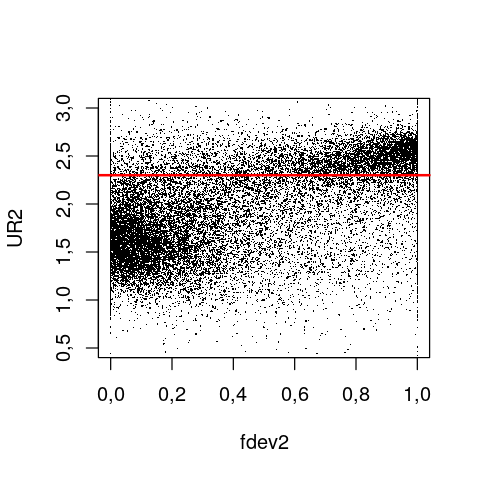

In [24]:
#ELIJO UR~2.2 para separar las tardias de las tempranas... medio trucho -> paper.
#en el paper se quedan con G-R~0.7 (en vez de U-R~2.2) por algo de el filtor del SDSS
plot(fdev2,UR2,xlim=c(0,1),pch='.',ylim=c(.5,3))
abline(2.3,0,col='red',lwd=2)

In [25]:
#¿que tan bien anda esto?  
early <- subset(UR2, UR2 > 2.3)
earlyC <- subset(C2, UR2 > 2.3)
late <- subset(early, C2 < 0.5)
temp <- hist(early,breaks=seq(-200,200,.1),plot=FALSE)
tard <- hist(late, breaks=seq(-200,200,.1),plot=FALSE)

In [26]:
#plot(tard$mids,tard$count,type='s',xlim=c(-23,72.2))
#points(tard$mids,tard$count,type='s',col='red')

In [27]:
# separo en tipo temprano y tardio segun el indice de concentracion C 
Mr_early <- subset(Mr2, C2> 2.58)
UR_early <- subset(UR2, C2 > 2.58)
Mr_late <- subset(Mr2, C2 <= 2.58)
UR_late <- subset(UR2, C2 <= 2.58)
r50_early <- subset(r502, C2 > 2.58)
r50_late <- subset(r502, C2 <= 2.58)
mu_early <- subset(mu2, C2 > 2.58)
mu_late <- subset(mu2, C2 <= 2.58)

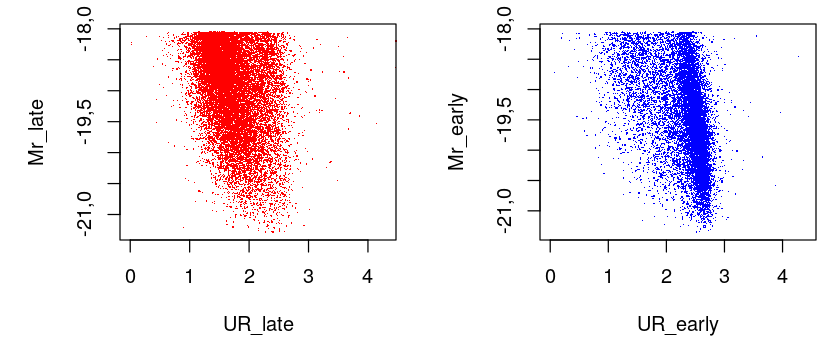

In [28]:
library(repr)
options(repr.plot.width=7, repr.plot.height=3)
par(mar=c(5,5,1,1))
par(mfrow=c(1,2))
plot(UR_late, Mr_late,pch='.',col='red',xlim=c(0,4.3))
plot(UR_early,Mr_early,pch='.',col='blue',xlim=c(0,4.4))

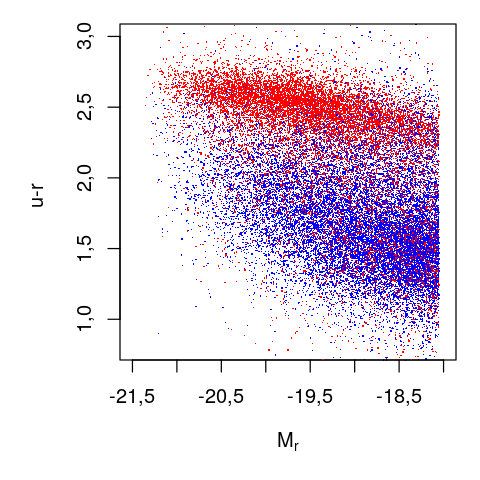

In [29]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
par(mar=c(5,5,1,1))
par(mfrow=c(1,1))
plot(Mr_late,UR_late,pch='.',col='blue',ylim=c(0.8,3),xlab=expression(M[r]),ylab='u-r ',xlim=c(-21.5,-18))
points(Mr_early,UR_early,pch='.',col='red')
legend(-17.7,2.8,pch=19,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=1)


In [49]:
Mr_e_col <- subset(Mr2, UR2 > 2.22)
UR_e_col <- subset(UR2, UR2 > 2.22)
Mr_l_col <- subset(Mr2, UR2 <= 2.22)
UR_l_col <- subset(UR2, UR2 <= 2.22)
r50_e_col <- subset(r502, UR2 > 2.22)
r50_l_col <- subset(r502, UR2 <= 2.22)
mu_e_col <- subset(mu2, UR2 > 2.22 ) 
mu_l_col <- subset(mu2, UR2 <= 2.22)

In [50]:
Mr_er <- subset(Mr2, UR2 > 2.3 & C2 >= 2.58)
Mr_la <- subset(Mr2, UR2 <= 2.3 & C2 < 2.58)
UR_er <- subset(UR2, UR2 > 2.3 & C2 >= 2.58)
UR_la <- subset(UR2, UR2 <= 2.3 & C2 < 2.58)
r50_er <- subset(r502, UR2 > 2.3 & C2 >= 2.58)
r50_la <- subset(r502, UR2 <= 2.3 & C2 < 2.58)
mu_er <- subset(mu2, UR2 > 2.3 & C2 >= 2.58)
mu_la <- subset(mu2, UR2 <= 2.3 & C2 < 2.58)

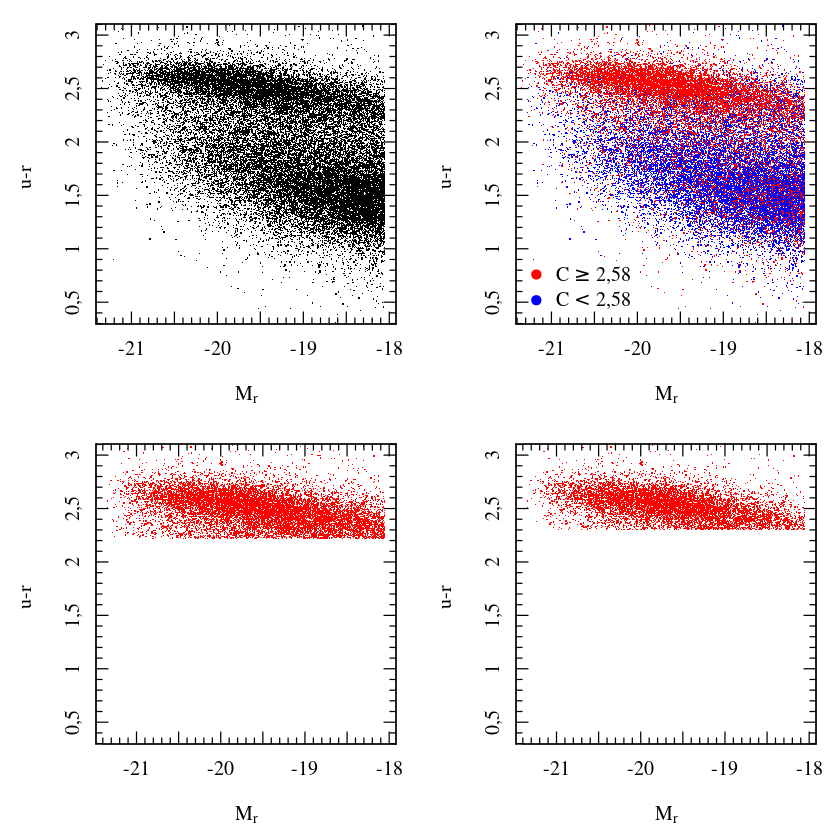

In [52]:
#png('color_mag.png')
#library(repr)
library(astro)
options(repr.plot.width=7, repr.plot.height=7)
#par(oma=c(0.5,0.3,0.3,0.3))  
par(mar=c(4,4,1,1))
par(mfrow=c(2,2))
par(family='serif')
par(lwd=1)
par(cex=1)

aplot(Mr_late,UR_late,pch='.',col='black',ylim=c(0.4,3),xlab=expression(M[r]),ylab='u-r ')
points(Mr_early, UR_early,pch='.',col='black')

aplot(Mr_late,UR_late,pch='.',col='blue',ylim=c(0.4,3),xlab=expression(M[r]),ylab='u-r ')
points(Mr_early,UR_early,pch='.',col='red')
legend(-21.4,1,pch=19,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=1,y.intersp=1)

aplot(Mr_e_col, UR_e_col, col='red', ylim=c(0.4,3),pch='.',xlab=expression(M[r]),ylab='u-r ')
#points(Mr_l_col,UR_l_col, col='blue',pch='.')
#legend(-21.5,1.2,pch=19,c(expression(u-r>2.3),expression(u-r<=2.3)),col=c('red','blue'),bty='n',cex=1)

aplot(Mr_er, UR_er, col='red',ylim=c(.4,3),pch='.',xlab=expression(M[r]),ylab='u-r ')
#points(Mr_la, UR_la, col='blue', pch='.')
#legend(-21.45,1.0,pch=19,c(expression(u-r>2.3),expression(u-r<=2.3)),col=c('red','blue'),bty='n',cex=1)
#legend(-20.25,1.0,c(',',','),bty='n')
#legend(-20.15,1.0,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=1)
#lm(UR_er~Mr_er)->er
#abline(er, col='black', lwd=2,lty=7)
#lm(UR_la~Mr_la)->la
#abline(la, col='black', lwd=2,lty=7)

#dev.off()

In [33]:
er

ERROR: Error in eval(expr, envir, enclos): objeto 'er' no encontrado


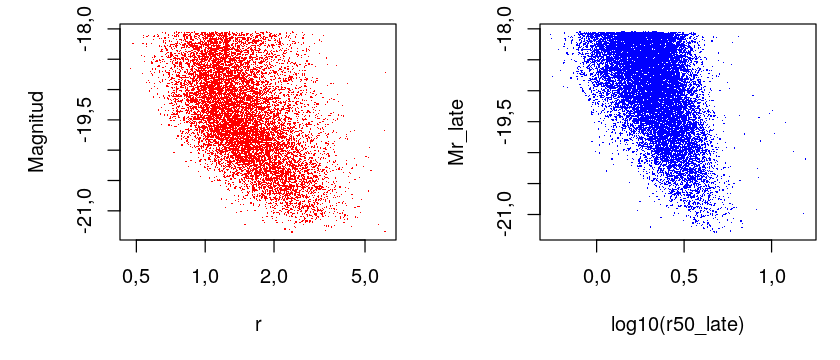

In [34]:
library(repr)
options(repr.plot.width=7, repr.plot.height=3)
par(mar=c(5,5,1,1))
par(mfrow=c(1,2))
plot((r50_early),Mr_early, col='red',pch='.',xlab='r',ylab='Magnitud',log='x')

plot(log10(r50_late),Mr_late,col='blue',pch='.')
#cuatro plots, total, total pintado por C, total por u-r, total con erly y rojas y late azules (con ajuste)

In [53]:
# valor de corte para U-R : 2.3
Mr_e_col <- subset(Mr2, UR2> 2.22)
UR_e_col <- subset(UR2, UR2 > 2.22)
Mr_l_col <- subset(Mr2, UR2 <= 2.22)
UR_l_col <- subset(UR2, UR2 <= 2.22)
r50_e_col <- subset(r502, UR2 > 2.22)
r50_l_col <- subset(r502, UR2 <= 2.22)
mu_e_col <- subset(mu2, UR2 > 2.22 ) 
mu_l_col <- subset(mu2, UR2 <= 2.22)

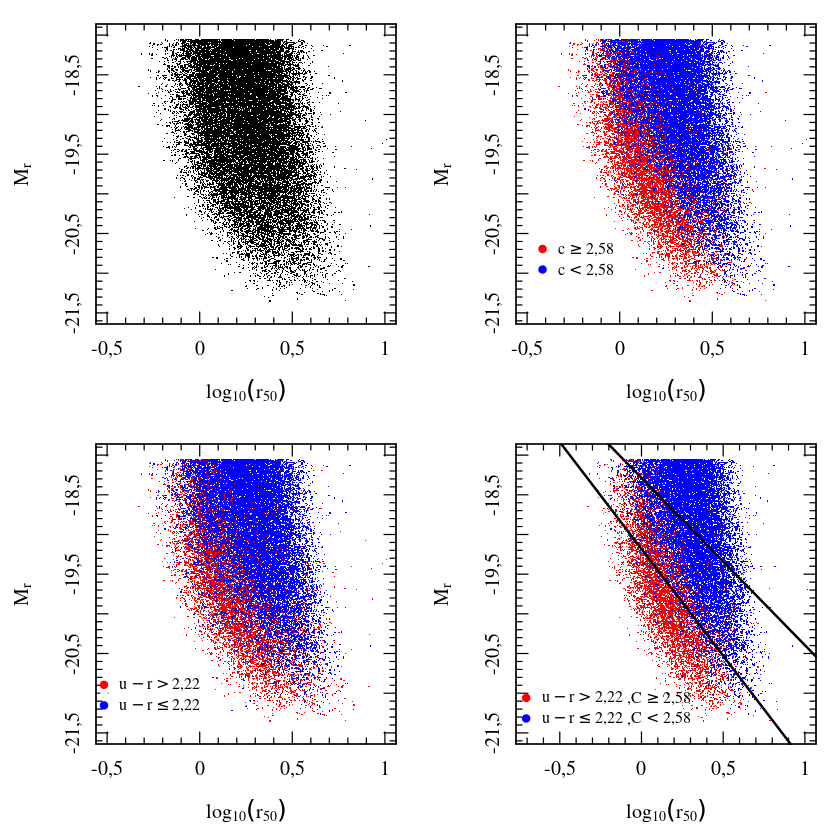

In [79]:
#corte para cuando cumplen ambos criterios
#png('mag_radio.png')
#library(repr)
library(astro)
options(repr.plot.width=7, repr.plot.height=7)
#par(oma=c(0.5,0.3,0.3,0.3))  
par(mar=c(4,4,1,1))
par(mfrow=c(2,2))
par(family='serif')
par(lwd=1)
par(cex=1)

aplot(log10(r50_e_col), Mr_e_col, pch='.',col='black',xlab=expression(log[10](r[50])),ylab=expression(M[r]),ylim=c(-21.5,-18),xlim=c(-0.5,1))
points(log10(r50_l_col),Mr_l_col,pch='.',col='black')

aplot(log10(r50_early),Mr_early,pch='.',col='red',xlab=expression(log[10](r[50])),ylab=expression(M[r]),xlim=c(-0.5,1),ylim=c(-21.5,-18))
points(log10(r50_late),Mr_late,pch='.',col='blue')
legend(-0.5,-20.5,pch=19,c(expression(c>=2.58),'',expression(c<2.58)),col=c('red','white','blue'),cex=.8,bty='n',y.intersp=.5)

aplot(log10(r50_e_col),Mr_e_col,pch='.',col='red',xlab=expression(log[10](r[50])),ylab=expression(M[r]),ylim=c(-21.5,-18),xlim=c(-0.5,1))
points(log10(r50_l_col),Mr_l_col,pch='.',col='blue')
legend(-0.6,-20.7,bty='n',pch=19,c(expression(u-r>2.22),'',expression(u-r<=2.22)),col=c('red','white','blue'),cex=.8,y.intersp=.5)

aplot(log10(r50_er),Mr_er,pch='.',col='red',xlab=expression(log[10](r[50])),ylab=expression(M[r]),ylim=c(-21.5,-18),xlim=c(-0.7,1))
points(log10(r50_la),Mr_la,pch='.',col='blue',xlab=expression(log[10](r[50])),ylab=expression(M[r]))
legend(-0.8,-20.8,pch=19,c(expression(u-r>2.22),expression(u-r<=2.22)),col=c('red','blue'),bty='n',cex=.8)
legend(-0.28,-20.8,c(',',','),bty='n',cex=.8)
legend(-0.25,-20.8,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=.8)

lm(Mr_er~log10(r50_er))->er
abline(er, col='black', lwd=2,lty=7)
lm(Mr_la~log10(r50_la))->la
abline(la, col='black', lwd=2,lty=7)

#dev.off()

#las tempranas TIENEN que se mas grandes.. r50 es el tamaño de el 50% de la luz, no es el tamaño de la galaxia, o si?..

In [81]:
summary(er)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = Mr_er ~ log10(r50_er))

Residuals:
     Min       1Q   Median       3Q      Max 
-1,53196 -0,39340 -0,05709  0,35777  2,34462 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   -19,182521   0,008362 -2294,15   <2e-16 ***
log10(r50_er)  -2,693370   0,035332   -76,23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,54 on 8909 degrees of freedom
Multiple R-squared:  0,3948,	Adjusted R-squared:  0,3947 
F-statistic:  5811 on 1 and 8909 DF,  p-value: < 2,2e-16


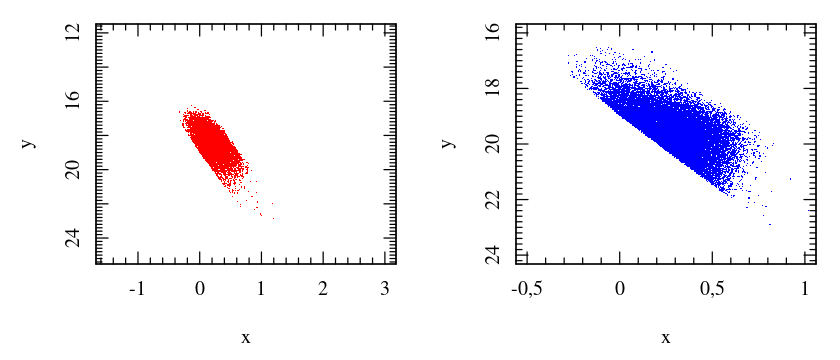

In [40]:
#por COLOR
library(repr)
library(astro)
options(repr.plot.width=7, repr.plot.height=3)
#par(oma=c(0.5,0.3,0.3,0.3))  
par(mar=c(4,4,1,1))
par(mfrow=c(1,2))
par(family='serif')
par(lwd=1)
par(cex=1)

aplot(log10(r50_e_col), mu_e_col, pch='.',xlim=c(-1.5,3), ylim=c(25,12),col='red')
#lm(mu_e_col~log10(r50_e_col))->z
#abline(z)
aplot(log10(r50_l_col), mu_l_col, pch='.',xlim=c(-.5,1),ylim=c(24,16),col='blue')
#lm(mu_l_col~log10(r50_l_col))->z2
#abline(z2)


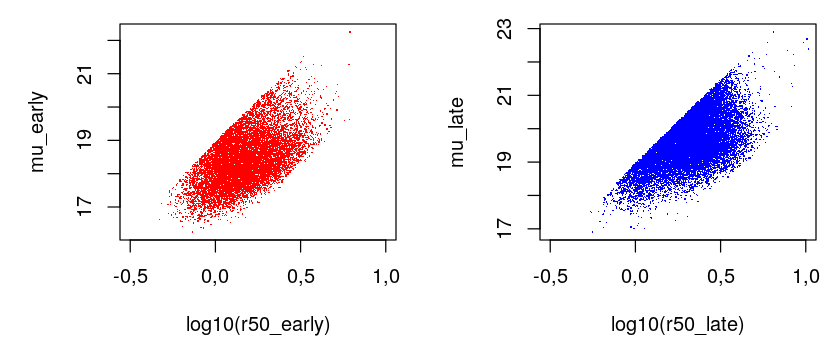

In [41]:
library(repr)
options(repr.plot.width=7, repr.plot.height=3)
par(mar=c(5,5,1,1))
par(mfrow=c(1,2))
plot(log10(r50_early), mu_early, pch='.',xlim=c(-.5,1),col='red')
plot(log10(r50_late), mu_late, pch='.',xlim=c(-.5,1),col='blue')
#los mismos cuatro graficos que antes

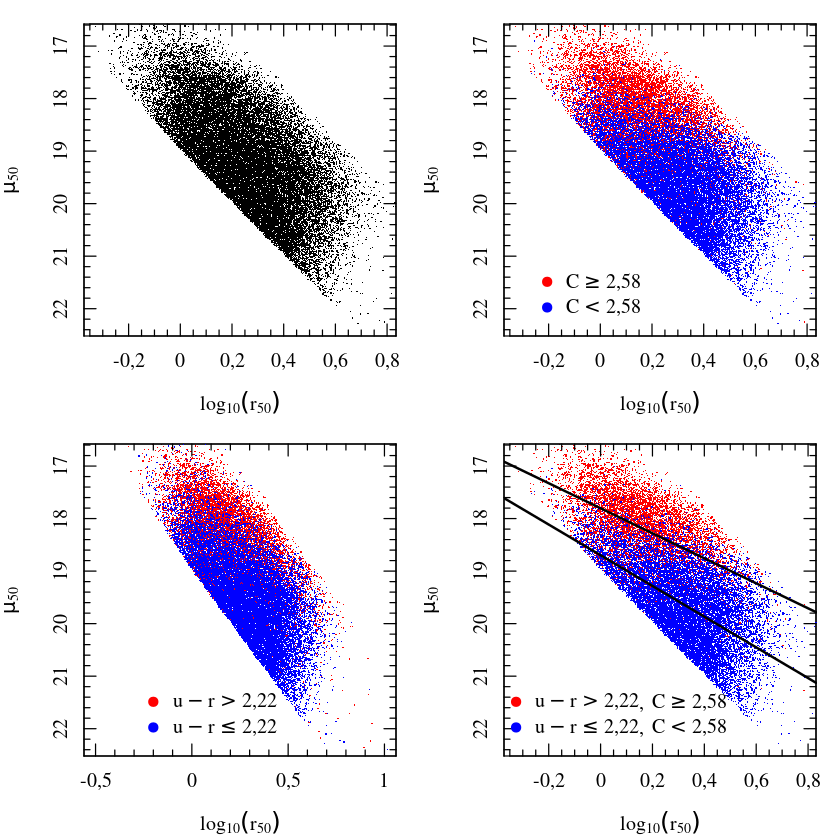

In [89]:
#png('brillo_r.png')
library(repr)
library(astro)
options(repr.plot.width=7, repr.plot.height=7)
#par(oma=c(0.5,0.3,0.3,0.3))  
par(mar=c(3.5,3.5,1,1))
par(mfrow=c(2,2))
par(family='serif')
par(lwd=1)
par(cex=1)

aplot(log10(r50_early), mu_early, pch='.', col='black', xlab=expression(log[10](r[50])),ylab=expression(mu[50]),ylim=c(22.3,16.8))
points(log10(r50_late), mu_late, pch='.', col='black')

aplot(log10(r50_early), mu_early, pch='.',col='red1',xlab=expression(log[10](r[50])),ylab=expression(mu[50]),ylim=c(22.3,16.8))
points(log10(r50_late), mu_late, pch='.', col='blue')
legend(-.28,21,pch=19,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=1)

aplot(log10(r50_e_col), mu_e_col, pch='.',col='red1',xlab=expression(log[10](r[50])),ylab=expression(mu[50]),ylim=c(22.3,16.8),xlim=c(-.5,1))
points(log10(r50_l_col),mu_l_col,pch='.',col='blue')
legend(-.3,21,pch=19,c(expression(u-r>2.22),expression(u-r<=2.22)),col=c('red','blue'),bty='n',cex=1)

aplot(log10(r50_er), mu_er, col='red1', pch='.',xlab=expression(log[10](r[50])),ylab=expression(mu[50]),ylim=c(22.3,16.8))
points(log10(r50_la), mu_la, col='blue', pch='.')
legend(-.4,21,pch=19,c(expression(u-r>2.22),expression(u-r<=2.22)),col=c('red','blue'),bty='n',cex=1)
legend(-.0,21,c(',',','),bty='n')
legend(0.05,21,c(expression(C>=2.58),expression(C<2.58)),col=c('red','blue'),bty='n',cex=1)
lm(mu_er~log10(r50_er))->ze
abline(ze, col='black', lwd=2,lty=7)
lm(mu_la~log10(r50_la))->za
abline(za,col='black',lwd=2, lty=7)
#dev.off()

In [91]:
summary(ze)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = mu_er ~ log10(r50_er))

Residuals:
     Min       1Q   Median       3Q      Max 
-1,48201 -0,39434 -0,06077  0,35273  2,34108 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17,803672   0,008314 2141,30   <2e-16 ***
log10(r50_er)  2,381295   0,035133   67,78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,537 on 8909 degrees of freedom
Multiple R-squared:  0,3402,	Adjusted R-squared:  0,3401 
F-statistic:  4594 on 1 and 8909 DF,  p-value: < 2,2e-16
